(354, 13)
(152, 13)
(354,)
(152,)
Epoch 1 / 100
1/1 [================================] - loss:  542.8899999999725
                                         test loss: 542.8899999068515
Epoch 2 / 100
1/1 [================================] - loss:  542.728063631518
                                         test loss: 539.1603881939803
Epoch 3 / 100
1/1 [================================] - loss:  541.781750572919
                                         test loss: 538.6659998445632
Epoch 4 / 100
1/1 [================================] - loss:  540.8902138528642
                                         test loss: 537.7228011317271
Epoch 5 / 100
1/1 [================================] - loss:  540.1605577672739
                                         test loss: 537.700122957368
Epoch 6 / 100
1/1 [================================] - loss:  539.5744800841442
                                         test loss: 537.2185581305964
Epoch 7 / 100
1/1 [================================] - loss:  539.092

Epoch 57 / 100
1/1 [================================] - loss:  534.867932468844
                                         test loss: 535.4882121719256
Epoch 58 / 100
1/1 [================================] - loss:  534.8475446937837
                                         test loss: 535.4543359734375
Epoch 59 / 100
1/1 [================================] - loss:  534.8276249955134
                                         test loss: 535.4533182431202
Epoch 60 / 100
1/1 [================================] - loss:  534.8081832071456
                                         test loss: 535.4206216426567
Epoch 61 / 100
1/1 [================================] - loss:  534.7891702001641
                                         test loss: 535.4190447054742
Epoch 62 / 100
1/1 [================================] - loss:  534.7705956169981
                                         test loss: 535.3874539714908
Epoch 63 / 100
1/1 [================================] - loss:  534.7524149914042
              

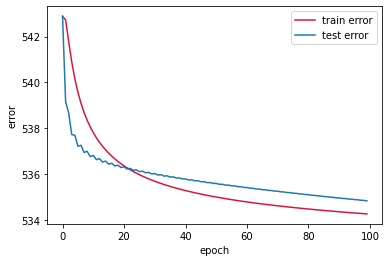

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

bos = load_boston() 
df = pd.DataFrame(bos.data) 
df.columns = bos.feature_names 
df['Price'] = bos.target 
data = df[df.columns[:-1]] 
data['Price'] = df.Price 

X = data.drop('Price', axis=1).to_numpy() 
y = data['Price'].to_numpy() 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

class boston_NN(object): #declaration of class
    def __init__(s): #s is the object
        s.bias=0.33
        s.learning_rate=0.00001
        s.input = 13 # feature numbers
        s.output = 1 # no.of outputs
        s.hidden_perceptron =3 # single layer and the number of preceptron in that layer
        
        s.train_err = list()
        s.test_err = list()
        s.train_err2 = list()
        s.train_plot = list()
        s.test_plot = list()

        np.random.seed(1) 
        # random assignment of weights: input -> hidden layer 
        s.Winput_Hidden = np.random.randn(s.input, s.hidden_perceptron) #13x2

        # random assignment of weights: hidden layer -> output
        s.Whidden_output = np.random.randn(s.hidden_perceptron, s.output) #2x1

    def relu(s,z):
        return np.maximum(0,z)
    def relu_grad(s,x):
        return x > 0
    def sigmoid(s,x):
        return 1/(1+np.exp(-x))
    def sigmoid_derivative(s,x):
        return s.sigmoid(x)*(1-s.sigmoid(x))
        
    def ForwardPass(s, X):
    
        s.netH = np.dot(s.Winput_Hidden.T, X) +s.bias #dot product of input to hidden layer
        s.outH = s.relu(s.netH)                       #activation
   
        s.netO = np.dot(s.Whidden_output.T, s.outH) +s.bias  #dot product of hidden to output layer
        s.outO = s.sigmoid_derivative(s.netO)                #activation

        return s.outO #return output
    
    def MSE(s, predict, y): #mean square error function
        loss = np.mean (np.square(predict-y)) 
        return loss
  
    def Backward_Propagation(s,predict, X, y):
        #change in weight for weights hidden->output
        deltaoutO = predict - y #loss
        dnetO = np.multiply(deltaoutO, s.sigmoid_derivative(predict)) #loss*derivative of output
        s.dWhidden_output = np.sum(np.multiply(s.outH, dnetO)) #output at Hidden *loss*derivative of ouput
        #new weight=old weight + -lr*change in weight
        s.Whidden_output = s.Whidden_output - np.dot(s.learning_rate,s.dWhidden_output)
        
        #change in weight for weights input->hidden 
        #-loss*drivative of output*respective weight*derivative of output at Hidden*input
        deltaoutH = -deltaoutO*s.sigmoid_derivative(predict)*s.Whidden_output.T*s.sigmoid_derivative(s.outH)
        s.dWinput_Hidden = np.sum(np.multiply(X, deltaoutH.T)) 
        #new weight=old weight + -lr*change in weight
        s.Winput_Hidden = s.Winput_Hidden - np.dot(s.learning_rate,s.dWinput_Hidden.T)

                                   
if __name__=='__main__': #this is the main function
    i=1
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3) # split training data and testing data
    e=100 #no.of epochs
    net = boston_NN() #declaration of class object
    for epoch in range(e):
        for itr in range(6): #batch size=6
            df=shuffle(df) #after each one iteration randomly shuffle the rows of dataset
            df = df.sample(frac=1).reset_index(drop=True)
            for u in range(59): #take first 59 data points for each batch which is shuffled each time to give new data points
                output=net.ForwardPass(X[u]) #apply forward pass
                error=net.MSE(output,y[u]) #calculate error
            net.train_err.append(error)
            mean=np.sum(net.train_err)/len(net.train_err) #take mean train error of 1 batch 
            net.train_err2.append(mean) 
            net.Backward_Propagation(output,X[u],y[u]) #back propagate and update weights for 1 batch
            
        avg = sum(net.train_err2) / len(net.train_err2) #average train error of batches for one epoch
        net.train_plot.append(avg)
        for g in range(152): #to run the final weights of this epoch on test data
            output2=net.ForwardPass(X[u]) #one by one test data point passed in forward pass
            loss2 = net.MSE(output2,y[u]) #test error
            net.test_err.append(loss2)
        avg2=sum(net.test_err)/len(net.test_err)
        net.test_plot.append(avg2)
           
        print("Epoch", i, "/",e)
        print("1/1 [================================] - loss: ", avg)
        print("                                         test loss:",avg2)
        i = i + 1

    import matplotlib.pyplot as plt
    import seaborn as sns
    def createList(n):
        lst = []
        for i in range(n):
            lst.append(i)
        return(lst)
    loops=createList(e) #create a list for no.of epochs
    train = net.train_plot #train error of each epoch stored in train_plot
    sns.lineplot(x=loops,y=train,color='crimson',label='train error') #plot epochs on x-axis and train error on y
    sns.lineplot(x=loops,y=net.test_plot,label='test error')
    plt.ylabel("error")
    plt.xlabel("epoch")
    plt.show()

